In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install sastrawi
!pip install emoji
!pip install pandas
!pip install matplotlib
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=2bdf038a3e7a7128aa8a1f0354c15a29d0ef84fc153d52b790d073d2121161e6
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: h

In [ ]:
import pandas as pd
import os
import re
import string
import numpy as np
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
#Read Data
def load_data():
  data = pd.read_csv('/content/DataFIFACrawling.csv')
  return data

In [ ]:
tweet_df = load_data()
# df (data frame)

In [ ]:
tweet_df = pd.DataFrame(tweet_df[['Username', 'Datetime', 'Tweet']])
tweet_df.head()

,Username,Datetime,Tweet
0,wdtu,2023-03-29 23:54:18+00:00,Potential sanctions against the PSSI may also ...
1,ismailfahmi,2023-03-29 23:45:59+00:00,Media Sosial\n\nPro (27%):\n• Minta warganet p...
2,Rahman12996,2023-03-29 23:25:49+00:00,Skenarionya gini\n-Argentina gagal lolos Piala...
3,FardaniYS,2023-03-29 22:17:15+00:00,"Sangat disayangkan akhirnya Pildun U-20 batal,..."
4,2karakterbisa,2023-03-29 22:09:34+00:00,"Batal jadi tuan rumah Piala Dunia U-20, apa yg..."


# Cleaning

In [ ]:
import re
import nltk
import pandas as pd
import string

def clean_text(text):
    """
    Membersihkan teks dengan menghapus URL, username, karakter non-alfanumerik dan tanda baca
    """
    # menghapus URL
    text = re.sub(r"http\S+", "", text)
    # menghapus username
    text = re.sub(r"@[^\s]+", "", text)
    # hanya menghapus kata mengandung "U-20"
    text = re.sub(r'U-20','', text)
    text = re.sub(r'U20','', text)
    # menghapus karakter non-alfanumerik
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # menghapus tanda baca
    text = text.translate(str.maketrans("", "", string.punctuation))
    # menghapus spasi ganda
    text = re.sub(r"\s+", " ", text).strip()
    # hapus angka
    text = re.sub(r'[0-9]','', text)

    return text
tweet_df['Clean'] = tweet_df['Tweet'].apply(lambda x: clean_text(x))
tweet_df.head()

,Username,Datetime,Tweet,Clean
0,wdtu,2023-03-29 23:54:18+00:00,Potential sanctions against the PSSI may also ...,Potential sanctions against the PSSI may also ...
1,ismailfahmi,2023-03-29 23:45:59+00:00,Media Sosial\n\nPro (27%):\n• Minta warganet p...,Media Sosial Pro Minta warganet professional ...
2,Rahman12996,2023-03-29 23:25:49+00:00,Skenarionya gini\n-Argentina gagal lolos Piala...,Skenarionya gini Argentina gagal lolos Piala D...
3,FardaniYS,2023-03-29 22:17:15+00:00,"Sangat disayangkan akhirnya Pildun U-20 batal,...",Sangat disayangkan akhirnya Pildun batal batal...
4,2karakterbisa,2023-03-29 22:09:34+00:00,"Batal jadi tuan rumah Piala Dunia U-20, apa yg...",Batal jadi tuan rumah Piala Dunia apa yg bisa ...


# Tokenize

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_text(text):

    #Membuat token dari teks

    # tokenisasi kata
    tokens = word_tokenize(text)

    return tokens
tweet_df['Tokenization'] = tweet_df['Clean'].apply(lambda x: tokenize_text(x))
tweet_df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Username,Datetime,Tweet,Clean,Tokenization
0,wdtu,2023-03-29 23:54:18+00:00,Potential sanctions against the PSSI may also ...,Potential sanctions against the PSSI may also ...,"[Potential, sanctions, against, the, PSSI, may..."
1,ismailfahmi,2023-03-29 23:45:59+00:00,Media Sosial\n\nPro (27%):\n• Minta warganet p...,Media Sosial Pro Minta warganet professional ...,"[Media, Sosial, Pro, Minta, warganet, professi..."
2,Rahman12996,2023-03-29 23:25:49+00:00,Skenarionya gini\n-Argentina gagal lolos Piala...,Skenarionya gini Argentina gagal lolos Piala D...,"[Skenarionya, gini, Argentina, gagal, lolos, P..."
3,FardaniYS,2023-03-29 22:17:15+00:00,"Sangat disayangkan akhirnya Pildun U-20 batal,...",Sangat disayangkan akhirnya Pildun batal batal...,"[Sangat, disayangkan, akhirnya, Pildun, batal,..."
4,2karakterbisa,2023-03-29 22:09:34+00:00,"Batal jadi tuan rumah Piala Dunia U-20, apa yg...",Batal jadi tuan rumah Piala Dunia apa yg bisa ...,"[Batal, jadi, tuan, rumah, Piala, Dunia, apa, ..."


# Lower Case

In [ ]:
def convert_to_lowercase(tokens):
    """
    Mengonversi token menjadi huruf kecil
    """
    # konversi token menjadi huruf kecil
    lowercase_tokens = [token.lower() for token in tokens]

    return lowercase_tokens
tweet_df['Lowercase'] = tweet_df['Tokenization'].apply(lambda x: convert_to_lowercase(x))
tweet_df.head()

,Username,Datetime,Tweet,Clean,Tokenization,Lowercase
0,wdtu,2023-03-29 23:54:18+00:00,Potential sanctions against the PSSI may also ...,Potential sanctions against the PSSI may also ...,"[Potential, sanctions, against, the, PSSI, may...","[potential, sanctions, against, the, pssi, may..."
1,ismailfahmi,2023-03-29 23:45:59+00:00,Media Sosial\n\nPro (27%):\n• Minta warganet p...,Media Sosial Pro Minta warganet professional ...,"[Media, Sosial, Pro, Minta, warganet, professi...","[media, sosial, pro, minta, warganet, professi..."
2,Rahman12996,2023-03-29 23:25:49+00:00,Skenarionya gini\n-Argentina gagal lolos Piala...,Skenarionya gini Argentina gagal lolos Piala D...,"[Skenarionya, gini, Argentina, gagal, lolos, P...","[skenarionya, gini, argentina, gagal, lolos, p..."
3,FardaniYS,2023-03-29 22:17:15+00:00,"Sangat disayangkan akhirnya Pildun U-20 batal,...",Sangat disayangkan akhirnya Pildun batal batal...,"[Sangat, disayangkan, akhirnya, Pildun, batal,...","[sangat, disayangkan, akhirnya, pildun, batal,..."
4,2karakterbisa,2023-03-29 22:09:34+00:00,"Batal jadi tuan rumah Piala Dunia U-20, apa yg...",Batal jadi tuan rumah Piala Dunia apa yg bisa ...,"[Batal, jadi, tuan, rumah, Piala, Dunia, apa, ...","[batal, jadi, tuan, rumah, piala, dunia, apa, ..."


# hapus punct [ ] untuk normalized

In [ ]:
# Hapus punct
def remove_punct(text):
  text = " ".join([char for char in text if char not in string.punctuation])
  return text
tweet_df['Lowercase'] = tweet_df['Lowercase'].apply(lambda x: remove_punct(x))
tweet_df.head()

,Username,Datetime,Tweet,Clean,Tokenization,Lowercase
0,wdtu,2023-03-29 23:54:18+00:00,Potential sanctions against the PSSI may also ...,Potential sanctions against the PSSI may also ...,"[Potential, sanctions, against, the, PSSI, may...",potential sanctions against the pssi may also ...
1,ismailfahmi,2023-03-29 23:45:59+00:00,Media Sosial\n\nPro (27%):\n• Minta warganet p...,Media Sosial Pro Minta warganet professional ...,"[Media, Sosial, Pro, Minta, warganet, professi...",media sosial pro minta warganet professional d...
2,Rahman12996,2023-03-29 23:25:49+00:00,Skenarionya gini\n-Argentina gagal lolos Piala...,Skenarionya gini Argentina gagal lolos Piala D...,"[Skenarionya, gini, Argentina, gagal, lolos, P...",skenarionya gini argentina gagal lolos piala d...
3,FardaniYS,2023-03-29 22:17:15+00:00,"Sangat disayangkan akhirnya Pildun U-20 batal,...",Sangat disayangkan akhirnya Pildun batal batal...,"[Sangat, disayangkan, akhirnya, Pildun, batal,...",sangat disayangkan akhirnya pildun batal batal...
4,2karakterbisa,2023-03-29 22:09:34+00:00,"Batal jadi tuan rumah Piala Dunia U-20, apa yg...",Batal jadi tuan rumah Piala Dunia apa yg bisa ...,"[Batal, jadi, tuan, rumah, Piala, Dunia, apa, ...",batal jadi tuan rumah piala dunia apa yg bisa ...


# Normalize

In [ ]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


def normalize_text(text):
    """
    Normalisasi teks dengan mengganti kata-kata slang dan alay menjadi bentuk standar
    """
    # kamus kata slang dan alay yang akan digunakan untuk normalisasi
    slang_words = {'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 'banget', 'bg': 'abang', 'bgmn': 'bagaimana', 'bgt': 'banget', 'bijimane': 'bagaimana', 'bintal': 'bimbingan mental', 'bkl': 'akan', 'bknnya': 'bukannya', 'blegug': 'bodoh', 'blh': 'boleh', 'bln': 'bulan', 'blum': 'belum', 'bnci': 'benci', 'bnran': 'yang benar', 'bodor': 'lucu', 'bokap': 'ayah', 'boker': 'buang air besar', 'bokis': 'bohong', 'boljug': 'boleh juga', 'bonek': 'bocah nekat', 'boyeh': 'boleh', 'br': 'baru', 'brg': 'bareng', 'bro': 'saudara laki-laki', 'bru': 'baru', 'bs': 'bisa', 'bsen': 'bosan', 'bt': 'buat', 'btw': 'ngomong-ngomong', 'buaya': 'tidak setia', 'bubbu': 'tidur', 'bubu': 'tidur', 'bumil': 'ibu hamil', 'bw': 'bawa', 'bwt': 'buat', 'byk': 'banyak', 'byrin': 'bayarkan', 'cabal': 'sabar', 'cadas': 'keren', 'calo': 'makelar', 'can': 'belum', 'capcus': 'pergi', 'caper': 'cari perhatian', 'ce': 'cewek', 'cekal': 'cegah tangkal', 'cemen': 'penakut', 'cengengesan': 'tertawa', 'cepet': 'cepat', 'cew': 'cewek', 'chuyunk': 'sayang', 'cimeng': 'ganja', 'cipika cipiki': 'cium pipi kanan cium pipi kiri', 'ciyh': 'sih', 'ckepp': 'cakep', 'ckp': 'cakep', 'cmiiw': "correct me if i'm wrong", 'cmpur': 'campur', 'cong': 'banci', 'conlok': 'cinta lokasi', 'cowwyy': 'maaf', 'cp': 'siapa', 'cpe': 'capek', 'cppe': 'capek', 'cucok': 'cocok', 'cuex': 'cuek', 'cumi': 'Cuma miscall', 'cups': 'culun', 'curanmor': 'pencurian kendaraan bermotor', 'curcol': 'curahan hati colongan', 'cwek': 'cewek', 'cyin': 'cinta', 'd': 'di', 'dah': 'deh', 'dapet': 'dapat', 'de': 'adik', 'dek': 'adik', 'demen': 'suka', 'deyh': 'deh', 'dgn': 'dengan', 'diancurin': 'dihancurkan', 'dimaafin': 'dimaafkan', 'dimintak': 'diminta', 'disono': 'di sana', 'dket': 'dekat', 'dkk': 'dan kawan-kawan', 'dll': 'dan lain-lain', 'dlu': 'dulu', 'dngn': 'dengan', 'dodol': 'bodoh', 'doku': 'uang', 'dongs': 'dong', 'dpt': 'dapat', 'dri': 'dari', 'drmn': 'darimana', 'drtd': 'dari tadi', 'dst': 'dan seterusnya', 'dtg': 'datang', 'duh': 'aduh', 'duren': 'durian', 'ed': 'edisi', 'egp': 'emang gue pikirin', 'eke': 'aku', 'elu': 'kamu', 'emangnya': 'memangnya', 'emng': 'memang', 'endak': 'tidak', 'enggak': 'tidak', 'envy': 'iri', 'ex': 'mantan', 'fax': 'facsimile', 'fifo': 'first in first out', 'folbek': 'follow back', 'fyi': 'sebagai informasi', 'gaada': 'tidak ada uang', 'gag': 'tidak', 'gaje': 'tidak jelas', 'gak papa': 'tidak apa-apa', 'gan': 'juragan', 'gaptek': 'gagap teknologi', 'gatek': 'gagap teknologi', 'gawe': 'kerja', 'gbs': 'tidak bisa', 'gebetan': 'orang yang disuka', 'geje': 'tidak jelas', 'gepeng': 'gelandangan dan pengemis', 'ghiy': 'lagi', 'gile': 'gila', 'gimana': 'bagaimana', 'gino': 'gigi nongol', 'githu': 'gitu', 'gj': 'tidak jelas', 'gmana': 'bagaimana', 'gn': 'begini', 'goblok': 'bodoh', 'golput': 'golongan putih', 'gowes': 'mengayuh sepeda', 'gpny': 'tidak punya', 'gr': 'gede rasa', 'gretongan': 'gratisan', 'gtau': 'tidak tahu', 'gua': 'saya', 'guoblok': 'goblok', 'gw': 'saya', 'ha': 'tertawa', 'haha': 'tertawa', 'hallow': 'halo', 'hankam': 'pertahanan dan keamanan', 'hehe': 'he', 'helo': 'halo', 'hey': 'hai', 'hlm': 'halaman', 'hny': 'hanya', 'hoax': 'isu bohong', 'hr': 'hari', 'hrus': 'harus', 'hubdar': 'perhubungan darat', 'huff': 'mengeluh', 'hum': 'rumah', 'humz': 'rumah', 'ilang': 'hilang', 'ilfil': 'tidak suka', 'imho': 'in my humble opinion', 'imoetz': 'imut', 'item': 'hitam', 'itungan': 'hitungan', 'iye': 'iya', 'ja': 'saja', 'jadiin': 'jadi', 'jaim': 'jaga image', 'jayus': 'tidak lucu', 'jdi': 'jadi', 'jem': 'jam', 'jga': 'juga', 'jgnkan': 'jangankan', 'jir': 'anjing', 'jln': 'jalan', 'jomblo': 'tidak punya pacar', 'jubir': 'juru bicara', 'jutek': 'galak', 'k': 'ke', 'kab': 'kabupaten', 'kabor': 'kabur', 'kacrut': 'kacau', 'kadiv': 'kepala divisi', 'kagak': 'tidak', 'kalo': 'kalau', 'kampret': 'sialan', 'kamtibmas': 'keamanan dan ketertiban masyarakat', 'kamuwh': 'kamu', 'kanwil': 'kantor wilayah', 'karna': 'karena', 'kasubbag': 'kepala subbagian', 'katrok': 'kampungan', 'kayanya': 'kayaknya', 'kbr': 'kabar', 'kdu': 'harus', 'kec': 'kecamatan', 'kejurnas': 'kejuaraan nasional', 'kekeuh': 'keras kepala', 'kel': 'kelurahan', 'kemaren': 'kemarin', 'kepengen': 'mau', 'kepingin': 'mau', 'kepsek': 'kepala sekolah', 'kesbang': 'kesatuan bangsa', 'kesra': 'kesejahteraan rakyat', 'ketrima': 'diterima', 'kgiatan': 'kegiatan', 'kibul': 'bohong', 'kimpoi': 'kawin', 'kl': 'kalau', 'klianz': 'kalian', 'kloter': 'kelompok terbang', 'klw': 'kalau', 'km': 'kamu', 'kmps': 'kampus', 'kmrn': 'kemarin', 'knal': 'kenal', 'knp': 'kenapa', 'kodya': 'kota madya', 'komdis': 'komisi disiplin', 'komsov': 'komunis sovyet', 'kongkow': 'kumpul bareng teman-teman', 'kopdar': 'kopi darat', 'korup': 'korupsi', 'kpn': 'kapan', 'krenz': 'keren', 'krm': 'kirim', 'kt': 'kita', 'ktmu': 'ketemu', 'ktr': 'kantor', 'kuper': 'kurang pergaulan', 'kw': 'imitasi', 'kyk': 'seperti', 'la': 'lah', 'lam': 'salam', 'lamp': 'lampiran', 'lanud': 'landasan udara', 'latgab': 'latihan gabungan', 'lebay': 'berlebihan', 'leh': 'boleh', 'lelet': 'lambat', 'lemot': 'lambat', 'lgi': 'lagi', 'lgsg': 'langsung', 'liat': 'lihat', 'litbang': 'penelitian dan pengembangan', 'lmyn': 'lumayan', 'lo': 'kamu', 'loe': 'kamu', 'lola': 'lambat berfikir', 'louph': 'cinta', 'low': 'kalau', 'lp': 'lupa', 'luber': 'langsung, umum, bebas, dan rahasia', 'luchuw': 'lucu', 'lum': 'belum', 'luthu': 'lucu', 'lwn': 'lawan', 'maacih': 'terima kasih', 'mabal': 'bolos', 'macem': 'macam', 'macih': 'masih', 'maem': 'makan', 'magabut': 'makan gaji buta', 'maho': 'homo', 'mak jang': 'kaget', 'maksain': 'memaksa', 'malem': 'malam', 'mam': 'makan', 'maneh': 'kamu', 'maniez': 'manis', 'mao': 'mau', 'masukin': 'masukkan', 'melu': 'ikut', 'mepet': 'dekat sekali', 'mgu': 'minggu', 'migas': 'minyak dan gas bumi', 'mikol': 'minuman beralkohol', 'miras': 'minuman keras', 'mlah': 'malah', 'mngkn': 'mungkin', 'mo': 'mau', 'mokad': 'mati', 'moso': 'masa', 'mpe': 'sampai', 'msk': 'masuk', 'mslh': 'masalah', 'mt': 'makan teman', 'mubes': 'musyawarah besar', 'mulu': 'melulu', 'mumpung': 'selagi', 'munas': 'musyawarah nasional', 'muntaber': 'muntah dan berak', 'musti': 'mesti', 'muupz': 'maaf', 'mw': 'now watching', 'n': 'dan', 'nanam': 'menanam', 'nanya': 'bertanya', 'napa': 'kenapa', 'napi': 'narapidana', 'napza': 'narkotika, alkohol, psikotropika, dan zat adiktif ', 'narkoba': 'narkotika, psikotropika, dan obat terlarang', 'nasgor': 'nasi goreng', 'nda': 'tidak', 'ndiri': 'sendiri', 'ne': 'ini', 'nekolin': 'neokolonialisme', 'nembak': 'menyatakan cinta', 'ngabuburit': 'menunggu berbuka puasa', 'ngaku': 'mengaku', 'ngambil': 'mengambil', 'nganggur': 'tidak punya pekerjaan', 'ngapah': 'kenapa', 'ngaret': 'terlambat', 'ngasih': 'memberikan', 'ngebandel': 'berbuat bandel', 'ngegosip': 'bergosip', 'ngeklaim': 'mengklaim', 'ngeksis': 'menjadi eksis', 'ngeles': 'berkilah', 'ngelidur': 'menggigau', 'ngerampok': 'merampok', 'ngga': 'tidak', 'ngibul': 'berbohong', 'ngiler': 'mau', 'ngiri': 'iri', 'ngisiin': 'mengisikan', 'ngmng': 'bicara', 'ngomong': 'bicara', 'ngubek2': 'mencari-cari', 'ngurus': 'mengurus', 'nie': 'ini', 'nih': 'ini', 'niyh': 'nih', 'nmr': 'nomor', 'nntn': 'nonton', 'nobar': 'nonton bareng', 'np': 'now playing', 'ntar': 'nanti', 'ntn': 'nonton', 'numpuk': 'bertumpuk', 'nutupin': 'menutupi', 'nyari': 'mencari', 'nyekar': 'menyekar', 'nyicil': 'mencicil', 'nyoblos': 'mencoblos', 'nyokap': 'ibu', 'ogah': 'tidak mau', 'ol': 'online', 'ongkir': 'ongkos kirim', 'oot': 'out of topic', 'org2': 'orang-orang', 'ortu': 'orang tua', 'otda': 'otonomi daerah', 'otw': 'on the way, sedang di jalan', 'pacal': 'pacar', 'pake': 'pakai', 'pala': 'kepala', 'pansus': 'panitia khusus', 'parpol': 'partai politik', 'pasutri': 'pasangan suami istri', 'pd': 'pada', 'pede': 'percaya diri', 'pelatnas': 'pemusatan latihan nasional', 'pemda': 'pemerintah daerah', 'pemkot': 'pemerintah kota', 'pemred': 'pemimpin redaksi', 'penjas': 'pendidikan jasmani', 'perda': 'peraturan daerah', 'perhatiin': 'perhatikan', 'pesenan': 'pesanan', 'pgang': 'pegang', 'pi': 'tapi', 'pilkada': 'pemilihan kepala daerah', 'pisan': 'sangat', 'pk': 'penjahat kelamin', 'plg': 'paling', 'pmrnth': 'pemerintah', 'polantas': 'polisi lalu lintas', 'ponpes': 'pondok pesantren', 'pp': 'pulang pergi', 'prg': 'pergi', 'prnh': 'pernah', 'psen': 'pesan', 'pst': 'pasti', 'pswt': 'pesawat', 'pw': 'posisi nyaman', 'qmu': 'kamu', 'rakor': 'rapat koordinasi', 'ranmor': 'kendaraan bermotor', 're': 'reply', 'ref': 'referensi', 'rehab': 'rehabilitasi', 'rempong': 'sulit', 'repp': 'balas', 'restik': 'reserse narkotika', 'rhs': 'rahasia', 'rmh': 'rumah', 'ru': 'baru', 'ruko': 'rumah toko', 'rusunawa': 'rumah susun sewa', 'ruz': 'terus', 'saia': 'saya', 'salting': 'salah tingkah', 'sampe': 'sampai', 'samsek': 'sama sekali', 'sapose': 'siapa', 'satpam': 'satuan pengamanan', 'sbb': 'sebagai berikut', 'sbh': 'sebuah', 'sbnrny': 'sebenarnya', 'scr': 'secara', 'sdgkn': 'sedangkan', 'sdkt': 'sedikit', 'se7': 'setuju', 'sebelas dua belas': 'mirip', 'sembako': 'sembilan bahan pokok', 'sempet': 'sempat', 'sendratari': 'seni drama tari', 'sgt': 'sangat', 'shg': 'sehingga', 'siech': 'sih', 'sikon': 'situasi dan kondisi', 'sinetron': 'sinema elektronik', 'siramin': 'siramkan', 'sj': 'saja', 'skalian': 'sekalian', 'sklh': 'sekolah', 'skt': 'sakit', 'slesai': 'selesai', 'sll': 'selalu', 'slma': 'selama', 'slsai': 'selesai', 'smpt': 'sempat', 'smw': 'semua', 'sndiri': 'sendiri', 'soljum': 'sholat jumat', 'songong': 'sombong', 'sory': 'maaf', 'sosek': 'sosial-ekonomi', 'sotoy': 'sok tahu', 'spa': 'siapa', 'sppa': 'siapa', 'spt': 'seperti', 'srtfkt': 'sertifikat', 'stiap': 'setiap', 'stlh': 'setelah', 'suk': 'masuk', 'sumpek': 'sempit', 'syg': 'sayang', 't4': 'tempat', 'tajir': 'kaya', 'tau': 'tahu', 'taw': 'tahu', 'td': 'tadi', 'tdk': 'tidak', 'teh': 'kakak perempuan', 'telat': 'terlambat', 'telmi': 'telat berpikir', 'temen': 'teman', 'tengil': 'menyebalkan', 'tepar': 'terkapar', 'tggu': 'tunggu', 'tgu': 'tunggu', 'thankz': 'terima kasih', 'thn': 'tahun', 'tilang': 'bukti pelanggaran', 'tipiwan': 'TvOne', 'tks': 'terima kasih', 'tlp': 'telepon', 'tls': 'tulis', 'tmbah': 'tambah', 'tmen2': 'teman-teman', 'tmpah': 'tumpah', 'tmpt': 'tempat', 'tngu': 'tunggu', 'tnyta': 'ternyata', 'tokai': 'tai', 'toserba': 'toko serba ada', 'tpi': 'tapi', 'trdhulu': 'terdahulu', 'trima': 'terima kasih', 'trm': 'terima', 'trs': 'terus', 'trutama': 'terutama', 'ts': 'penulis', 'tst': 'tahu sama tahu', 'ttg': 'tentang', 'tuch': 'tuh', 'tuir': 'tua', 'tw': 'tahu', 'u': 'kamu', 'ud': 'sudah', 'udah': 'sudah', 'ujg': 'ujung', 'ul': 'ulangan', 'unyu': 'lucu', 'uplot': 'unggah', 'urang': 'saya', 'usah': 'perlu', 'utk': 'untuk', 'valas': 'valuta asing', 'w/': 'dengan', 'wadir': 'wakil direktur', 'wamil': 'wajib militer', 'warkop': 'warung kopi', 'warteg': 'warung tegal', 'wat': 'buat', 'wkt': 'waktu', 'wtf': 'what the fuck', 'xixixi': 'tertawa', 'ya': 'iya', 'yap': 'iya', 'yaudah': 'ya sudah', 'yawdah': 'ya sudah', 'yg': 'yang', 'yl': 'yang lain', 'yo': 'iya', 'yowes': 'ya sudah', 'yup': 'iya', '7an': 'tujuan', 'ababil': 'abg labil', 'acc': 'accord', 'adlah': 'adalah', 'adoh': 'aduh', 'aha': 'tertawa', 'aing': 'saya', 'aja': 'saja', 'ajj': 'saja', 'aka': 'dikenal juga sebagai', 'akko': 'aku', 'akku': 'aku', 'akyu': 'aku', 'aljasa': 'asal jadi saja', 'ama': 'sama', 'ambl': 'ambil', 'anjir': 'anjing', 'ank': 'anak', 'ap': 'apa', 'apaan': 'apa', 'ape': 'apa', 'aplot': 'unggah', 'apva': 'apa', 'aqu': 'aku', 'asap': 'sesegera mungkin', 'aseek': 'asyik', 'asek': 'asyik', 'aseknya': 'asyiknya', 'asoy': 'asyik', 'astrojim': 'astagfirullahaladzim', 'ath': 'kalau begitu', 'atuh': 'kalau begitu', 'ava': 'avatar', 'aws': 'awas', 'ayang': 'sayang', 'ayok': 'ayo', 'bacot': 'banyak bicara', 'bales': 'balas', 'bangdes': 'pembangunan desa', 'bangkotan': 'tua', 'banpres': 'bantuan presiden', 'bansarkas': 'bantuan sarana kesehatan', 'bazis': 'badan amal, zakat, infak, dan sedekah', 'bcoz': 'karena', 'beb': 'sayang', 'bejibun': 'banyak', 'belom': 'belum', 'bener': 'benar', 'ber2': 'berdua', 'berdikari': 'berdiri di atas kaki sendiri', 'bet': 'banget', 'beti': 'beda tipis', 'beut': 'banget', 'bgd': 'banget', 'bgs': 'bagus', 'bhubu': 'tidur', 'bimbuluh': 'bimbingan dan penyuluhan', 'bisi': 'kalau-kalau', 'bkn': 'bukan', 'bl': 'beli', 'blg': 'bilang', 'blm': 'belum', 'bls': 'balas', 'bnchi': 'benci', 'bngung': 'bingung', 'bnyk': 'banyak', 'bohay': 'badan aduhai', 'bokep': 'porno', 'bokin': 'pacar', 'bole': 'boleh', 'bolot': 'bodoh', 'bonyok': 'ayah ibu', 'bpk': 'bapak', 'brb': 'segera kembali', 'brngkt': 'berangkat', 'brp': 'berapa', 'brur': 'saudara laki-laki', 'bsa': 'bisa', 'bsk': 'besok', 'bu_bu': 'tidur', 'bubarin': 'bubarkan', 'buber': 'buka bersama', 'bujubune': 'luar biasa', 'buser': 'buru sergap', 'bwhn': 'bawahan', 'byar': 'bayar', 'byr': 'bayar', 'c8': 'chat', 'cabut': 'pergi', 'caem': 'cakep', 'cama-cama': 'sama-sama', 'cangcut': 'celana dalam', 'cape': 'capek', 'caur': 'jelek', 'cekak': 'tidak ada uang', 'cekidot': 'coba lihat', 'cemplungin': 'cemplungkan', 'ceper': 'pendek', 'ceu': 'kakak perempuan', 'cewe': 'cewek', 'cibuk': 'sibuk', 'cin': 'cinta', 'ciye': 'cie', 'ckck': 'ck', 'clbk': 'cinta lama bersemi kembali', 'cmpr': 'campur', 'cnenk': 'senang', 'congor': 'mulut', 'cow': 'cowok', 'coz': 'karena', 'cpa': 'siapa', 'gokil': 'gila', 'gombal': 'suka merayu', 'gpl': 'tidak pakai lama', 'gpp': 'tidak apa-apa', 'gretong': 'gratis', 'gt': 'begitu', 'gtw': 'tidak tahu', 'gue': 'saya', 'guys': 'teman-teman', 'gws': 'cepat sembuh', 'haghaghag': 'tertawa', 'hakhak': 'tertawa', 'handak': 'bahan peledak', 'hansip': 'pertahanan sipil', 'hellow': 'halo', 'helow': 'halo', 'hi': 'hai', 'hlng': 'hilang', 'hnya': 'hanya', 'houm': 'rumah', 'hrs': 'harus', 'hubad': 'hubungan angkatan darat', 'hubla': 'perhubungan laut', 'huft': 'mengeluh', 'humas': 'hubungan masyarakat', 'idk': 'saya tidak tahu', 'ilfeel': 'tidak suka', 'imba': 'jago sekali', 'imoet': 'imut', 'info': 'informasi', 'itung': 'hitung', 'isengin': 'bercanda', 'iyala': 'iya lah', 'iyo': 'iya', 'jablay': 'jarang dibelai', 'jadul': 'jaman dulu', 'jancuk': 'anjing', 'jd': 'jadi', 'jdikan': 'jadikan', 'jg': 'juga', 'jgn': 'jangan', 'jijay': 'jijik', 'jkt': 'jakarta', 'jnj': 'janji', 'jth': 'jatuh', 'jurdil': 'jujur adil', 'jwb': 'jawab', 'ka': 'kakak', 'kabag': 'kepala bagian', 'kacian': 'kasihan', 'kadit': 'kepala direktorat', 'kaga': 'tidak', 'kaka': 'kakak', 'kamtib': 'keamanan dan ketertiban', 'kamuh': 'kamu', 'kamyu': 'kamu', 'kapt': 'kapten', 'kasat': 'kepala satuan', 'kasubbid': 'kepala subbidang', 'kau': 'kamu', 'kbar': 'kabar', 'kcian': 'kasihan', 'keburu': 'terlanjur', 'kedubes': 'kedutaan besar', 'kek': 'seperti', 'keknya': 'kayaknya', 'keliatan': 'kelihatan', 'keneh': 'masih', 'kepikiran': 'terpikirkan', 'kepo': 'mau tahu urusan orang', 'kere': 'tidak punya uang', 'kesian': 'kasihan', 'ketauan': 'ketahuan', 'keukeuh': 'keras kepala', 'khan': 'kan', 'kibus': 'kaki busuk', 'kk': 'kakak', 'klian': 'kalian', 'klo': 'kalau', 'kluarga': 'keluarga', 'klwrga': 'keluarga', 'kmari': 'kemari', 'kmpus': 'kampus', 'kn': 'kan', 'knl': 'kenal', 'knpa': 'kenapa', 'kog': 'kok', 'kompi': 'komputer', 'komtiong': 'komunis Tiongkok', 'konjen': 'konsulat jenderal', 'koq': 'kok', 'kpd': 'kepada', 'kptsan': 'keputusan', 'krik': 'garing', 'krn': 'karena', 'ktauan': 'ketahuan', 'ktny': 'katanya', 'kudu': 'harus', 'kuq': 'kok', 'ky': 'seperti', 'kykny': 'kayanya', 'laka': 'kecelakaan', 'lambreta': 'lambat', 'lansia': 'lanjut usia', 'lapas': 'lembaga pemasyarakatan', 'lbur': 'libur', 'lekong': 'laki-laki', 'lg': 'lagi', 'lgkp': 'lengkap', 'lht': 'lihat', 'linmas': 'perlindungan masyarakat', 'lmyan': 'lumayan', 'lngkp': 'lengkap', 'loch': 'loh', 'lol': 'tertawa', 'lom': 'belum', 'loupz': 'cinta', 'lowh': 'kamu', 'lu': 'kamu', 'luchu': 'lucu', 'luff': 'cinta', 'luph': 'cinta', 'lw': 'kamu', 'lwt': 'lewat', 'maaciw': 'terima kasih', 'mabes': 'markas besar', 'macem-macem': 'macam-macam', 'madesu': 'masa depan suram', 'maen': 'main', 'mahatma': 'maju sehat bersama', 'mak': 'ibu', 'makasih': 'terima kasih', 'malah': 'bahkan', 'malu2in': 'memalukan', 'mamz': 'makan', 'manies': 'manis', 'mantep': 'mantap', 'markus': 'makelar kasus', 'mba': 'mbak', 'mending': 'lebih baik', 'mgkn': 'mungkin', 'mhn': 'mohon', 'miker': 'minuman keras', 'milis': 'mailing list', 'mksd': 'maksud', 'mls': 'malas', 'mnt': 'minta', 'moge': 'motor gede', 'mokat': 'mati', 'mosok': 'masa', 'msh': 'masih', 'mskpn': 'meskipun', 'msng2': 'masing-masing', 'muahal': 'mahal', 'muker': 'musyawarah kerja', 'mumet': 'pusing', 'muna': 'munafik', 'munaslub': 'musyawarah nasional luar biasa', 'musda': 'musyawarah daerah', 'muup': 'maaf', 'muuv': 'maaf', 'nal': 'kenal', 'nangis': 'menangis', 'naon': 'apa', 'napol': 'narapidana politik', 'naq': 'anak', 'narsis': 'bangga pada diri sendiri', 'nax': 'anak', 'ndak': 'tidak', 'ndut': 'gendut', 'nekolim': 'neokolonialisme', 'nelfon': 'menelepon', 'ngabis2in': 'menghabiskan', 'ngakak': 'tertawa', 'ngambek': 'marah', 'ngampus': 'pergi ke kampus', 'ngantri': 'mengantri', 'ngapain': 'sedang apa', 'ngaruh': 'berpengaruh', 'ngawur': 'berbicara sembarangan', 'ngeceng': 'kumpul bareng-bareng', 'ngeh': 'sadar', 'ngekos': 'tinggal di kos', 'ngelamar': 'melamar', 'ngeliat': 'melihat', 'ngemeng': 'bicara terus-terusan', 'ngerti': 'mengerti', 'nggak': 'tidak', 'ngikut': 'ikut', 'nginep': 'menginap', 'ngisi': 'mengisi', 'ngmg': 'bicara', 'ngocol': 'lucu', 'ngomongin': 'membicarakan', 'ngumpul': 'berkumpul', 'ni': 'ini', 'nyasar': 'tersesat', 'nyariin': 'mencari', 'nyiapin': 'mempersiapkan', 'nyiram': 'menyiram', 'nyok': 'ayo', 'o/': 'oleh', 'ok': 'ok', 'priksa': 'periksa', 'pro': 'profesional', 'psn': 'pesan', 'psti': 'pasti', 'puanas': 'panas', 'qmo': 'kamu', 'qt': 'kita', 'rame': 'ramai', 'raskin': 'rakyat miskin', 'red': 'redaksi', 'reg': 'register', 'rejeki': 'rezeki', 'renstra': 'rencana strategis', 'reskrim': 'reserse kriminal', 'sni': 'sini', 'somse': 'sombong sekali', 'sorry': 'maaf', 'sosbud': 'sosial-budaya', 'sospol': 'sosial-politik', 'sowry': 'maaf', 'spd': 'sepeda', 'sprti': 'seperti', 'spy': 'supaya', 'stelah': 'setelah', 'subbag': 'subbagian', 'sumbangin': 'sumbangkan', 'sy': 'saya', 'syp': 'siapa', 'tabanas': 'tabungan pembangunan nasional', 'tar': 'nanti', 'taun': 'tahun', 'tawh': 'tahu', 'tdi': 'tadi', 'te2p': 'tetap', 'tekor': 'rugi', 'telkom': 'telekomunikasi', 'telp': 'telepon', 'temen2': 'teman-teman', 'tengok': 'menjenguk', 'terbitin': 'terbitkan', 'tgl': 'tanggal', 'thanks': 'terima kasih', 'thd': 'terhadap', 'thx': 'terima kasih', 'tipi': 'TV', 'tkg': 'tukang', 'tll': 'terlalu', 'tlpn': 'telepon', 'tman': 'teman', 'tmbh': 'tambah', 'tmn2': 'teman-teman', 'tmph': 'tumpah', 'tnda': 'tanda', 'tnh': 'tanah', 'togel': 'toto gelap', 'tp': 'tapi', 'tq': 'terima kasih', 'trgntg': 'tergantung', 'trims': 'terima kasih', 'cb': 'coba', 'y': 'ya', 'munfik': 'munafik', 'reklamuk': 'reklamasi', 'sma': 'sama', 'tren': 'trend', 'ngehe': 'kesal', 'mz': 'mas', 'analisise': 'analisis', 'sadaar': 'sadar', 'sept': 'september', 'nmenarik': 'menarik', 'zonk': 'bodoh', 'rights': 'benar', 'simiskin': 'miskin', 'ngumpet': 'sembunyi', 'hardcore': 'keras', 'akhirx': 'akhirnya', 'solve': 'solusi', 'watuk': 'batuk', 'ngebully': 'intimidasi', 'masy': 'masyarakat', 'still': 'masih', 'tauk': 'tahu', 'mbual': 'bual', 'tioghoa': 'tionghoa', 'ngentotin': 'senggama', 'kentot': 'senggama', 'faktakta': 'fakta', 'sohib': 'teman', 'rubahnn': 'rubah', 'trlalu': 'terlalu', 'nyela': 'cela', 'heters': 'pembenci', 'nyembah': 'sembah', 'most': 'paling', 'ikon': 'lambang', 'light': 'terang', 'pndukung': 'pendukung','pildun': 'piala dunia', 'setting': 'atur', 'seting': 'akting', 'next': 'lanjut', 'waspadalah': 'waspada', 'gantengsaya': 'ganteng', 'parte': 'partai', 'nyerang': 'serang', 'nipu': 'tipu', 'ktipu': 'tipu', 'jentelmen': 'berani', 'buangbuang': 'buang', 'tsangka': 'tersangka', 'kurng': 'kurang', 'ista': 'nista', 'less': 'kurang', 'koar': 'teriak', 'paranoid': 'takut', 'problem': 'masalah', 'tahi': 'kotoran', 'tirani': 'tiran', 'tilep': 'tilap', 'happy': 'bahagia', 'tak': 'tidak', 'penertiban': 'tertib', 'uasai': 'kuasa', 'mnolak': 'tolak', 'trending': 'trend', 'taik': 'tahi', 'wkwkkw': 'tertawa', 'ahokncc': 'ahok', 'istaa': 'nista', 'benarjujur': 'jujur', 'mgkin': 'mungkin', 'gak': 'tidak', 'trus': 'lalu', 'dlm': 'dalam', 'tetep': 'tetap', 'skrg': 'sekarang', 'sm': 'dengan', 'udh': 'sudah', 'cm': 'cuma', 'org': 'orang', 'bangor': 'nakal', 'ngamuk': 'mengamuk', 'iso': 'bisa', 'mbuh': 'tidak tahu', 'kzl': 'kesal', 'name': 'nama'}

    # regex pattern untuk mencari kata-kata slang dan alay
    pattern = re.compile(r'\b(' + '|'.join(slang_words.keys()) + r')\b')

    # normalisasi kata-kata slang dan alay
    normalized_text = pattern.sub(lambda x: slang_words[x.group()], text)

    # tokenisasi teks yang sudah dinormalisasi
    tokens = word_tokenize(normalized_text)

    return tokens

tweet_df['Normalize'] = tweet_df['Lowercase'].apply(lambda x: normalize_text(x))
tweet_df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Username,Datetime,Tweet,Clean,Tokenization,Lowercase,Normalize
0,wdtu,2023-03-29 23:54:18+00:00,Potential sanctions against the PSSI may also ...,Potential sanctions against the PSSI may also ...,"[Potential, sanctions, against, the, PSSI, may...",potential sanctions against the pssi may also ...,"[potential, sanctions, against, the, pssi, may..."
1,ismailfahmi,2023-03-29 23:45:59+00:00,Media Sosial\n\nPro (27%):\n• Minta warganet p...,Media Sosial Pro Minta warganet professional ...,"[Media, Sosial, Pro, Minta, warganet, professi...",media sosial pro minta warganet professional d...,"[media, sosial, profesional, minta, warganet, ..."
2,Rahman12996,2023-03-29 23:25:49+00:00,Skenarionya gini\n-Argentina gagal lolos Piala...,Skenarionya gini Argentina gagal lolos Piala D...,"[Skenarionya, gini, Argentina, gagal, lolos, P...",skenarionya gini argentina gagal lolos piala d...,"[skenarionya, gini, argentina, gagal, lolos, p..."
3,FardaniYS,2023-03-29 22:17:15+00:00,"Sangat disayangkan akhirnya Pildun U-20 batal,...",Sangat disayangkan akhirnya Pildun batal batal...,"[Sangat, disayangkan, akhirnya, Pildun, batal,...",sangat disayangkan akhirnya pildun batal batal...,"[sangat, disayangkan, akhirnya, piala, dunia, ..."
4,2karakterbisa,2023-03-29 22:09:34+00:00,"Batal jadi tuan rumah Piala Dunia U-20, apa yg...",Batal jadi tuan rumah Piala Dunia apa yg bisa ...,"[Batal, jadi, tuan, rumah, Piala, Dunia, apa, ...",batal jadi tuan rumah piala dunia apa yg bisa ...,"[batal, jadi, tuan, rumah, piala, dunia, apa, ..."


# Stop Word Removal

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
# Baca file teks
with open('/content/id.stopwords.02.01.2016.txt', 'r') as file:
    text_stop = file.read()
more_stopword = [text_stop]
lagi = ['pssi', 'fifa', 'piala', 'dunia', 'u-20', 'u20', '20', 'u']

data = stop_factory.get_stop_words()+more_stopword+lagi
stopword = stop_factory.create_stop_word_remover()
print(data)

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in data]
    return filtered_tokens
tweet_df['Stopword'] = tweet_df['Normalize'].apply(lambda x: remove_stopwords(x))
tweet_df.head()

['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumla

,Username,Datetime,Tweet,Clean,Tokenization,Lowercase,Normalize,Stopword
0,wdtu,2023-03-29 23:54:18+00:00,Potential sanctions against the PSSI may also ...,Potential sanctions against the PSSI may also ...,"[Potential, sanctions, against, the, PSSI, may...",potential sanctions against the pssi may also ...,"[potential, sanctions, against, the, pssi, may...","[potential, sanctions, against, the, may, also..."
1,ismailfahmi,2023-03-29 23:45:59+00:00,Media Sosial\n\nPro (27%):\n• Minta warganet p...,Media Sosial Pro Minta warganet professional ...,"[Media, Sosial, Pro, Minta, warganet, professi...",media sosial pro minta warganet professional d...,"[media, sosial, profesional, minta, warganet, ...","[media, sosial, profesional, warganet, profess..."
2,Rahman12996,2023-03-29 23:25:49+00:00,Skenarionya gini\n-Argentina gagal lolos Piala...,Skenarionya gini Argentina gagal lolos Piala D...,"[Skenarionya, gini, Argentina, gagal, lolos, P...",skenarionya gini argentina gagal lolos piala d...,"[skenarionya, gini, argentina, gagal, lolos, p...","[skenarionya, gini, argentina, gagal, lolos, i..."
3,FardaniYS,2023-03-29 22:17:15+00:00,"Sangat disayangkan akhirnya Pildun U-20 batal,...",Sangat disayangkan akhirnya Pildun batal batal...,"[Sangat, disayangkan, akhirnya, Pildun, batal,...",sangat disayangkan akhirnya pildun batal batal...,"[sangat, disayangkan, akhirnya, piala, dunia, ...","[disayangkan, batal, batal, indonesia, main, t..."
4,2karakterbisa,2023-03-29 22:09:34+00:00,"Batal jadi tuan rumah Piala Dunia U-20, apa yg...",Batal jadi tuan rumah Piala Dunia apa yg bisa ...,"[Batal, jadi, tuan, rumah, Piala, Dunia, apa, ...",batal jadi tuan rumah piala dunia apa yg bisa ...,"[batal, jadi, tuan, rumah, piala, dunia, apa, ...","[batal, tuan, rumah, indonesia, hikmah, sanksi..."


# Finishing

In [ ]:
# Hapus punct
def remove_punct(text):
  text = " ".join([char for char in text if char not in string.punctuation])
  return text
tweet_df['Hasil'] = tweet_df['Stopword'].apply(lambda x: remove_punct(x))
tweet_df.head()

,Username,Datetime,Tweet,Clean,Tokenization,Lowercase,Normalize,Stopword,Hasil
0,wdtu,2023-03-29 23:54:18+00:00,Potential sanctions against the PSSI may also ...,Potential sanctions against the PSSI may also ...,"[Potential, sanctions, against, the, PSSI, may...",potential sanctions against the pssi may also ...,"[potential, sanctions, against, the, pssi, may...","[potential, sanctions, against, the, may, also...",potential sanctions against the may also be de...
1,ismailfahmi,2023-03-29 23:45:59+00:00,Media Sosial\n\nPro (27%):\n• Minta warganet p...,Media Sosial Pro Minta warganet professional ...,"[Media, Sosial, Pro, Minta, warganet, professi...",media sosial pro minta warganet professional d...,"[media, sosial, profesional, minta, warganet, ...","[media, sosial, profesional, warganet, profess...",media sosial profesional warganet professional...
2,Rahman12996,2023-03-29 23:25:49+00:00,Skenarionya gini\n-Argentina gagal lolos Piala...,Skenarionya gini Argentina gagal lolos Piala D...,"[Skenarionya, gini, Argentina, gagal, lolos, P...",skenarionya gini argentina gagal lolos piala d...,"[skenarionya, gini, argentina, gagal, lolos, p...","[skenarionya, gini, argentina, gagal, lolos, i...",skenarionya gini argentina gagal lolos indones...
3,FardaniYS,2023-03-29 22:17:15+00:00,"Sangat disayangkan akhirnya Pildun U-20 batal,...",Sangat disayangkan akhirnya Pildun batal batal...,"[Sangat, disayangkan, akhirnya, Pildun, batal,...",sangat disayangkan akhirnya pildun batal batal...,"[sangat, disayangkan, akhirnya, piala, dunia, ...","[disayangkan, batal, batal, indonesia, main, t...",disayangkan batal batal indonesia main tunggu ...
4,2karakterbisa,2023-03-29 22:09:34+00:00,"Batal jadi tuan rumah Piala Dunia U-20, apa yg...",Batal jadi tuan rumah Piala Dunia apa yg bisa ...,"[Batal, jadi, tuan, rumah, Piala, Dunia, apa, ...",batal jadi tuan rumah piala dunia apa yg bisa ...,"[batal, jadi, tuan, rumah, piala, dunia, apa, ...","[batal, tuan, rumah, indonesia, hikmah, sanksi...",batal tuan rumah indonesia hikmah sanksi israe...


In [ ]:
# HAPUS DATA KOSONG
tweet_df = tweet_df[tweet_df['Hasil']!='']
tweet_df.head()

,Username,Datetime,Tweet,Clean,Tokenization,Lowercase,Normalize,Stopword,Hasil
0,wdtu,2023-03-29 23:54:18+00:00,Potential sanctions against the PSSI may also ...,Potential sanctions against the PSSI may also ...,"[Potential, sanctions, against, the, PSSI, may...",potential sanctions against the pssi may also ...,"[potential, sanctions, against, the, pssi, may...","[potential, sanctions, against, the, may, also...",potential sanctions against the may also be de...
1,ismailfahmi,2023-03-29 23:45:59+00:00,Media Sosial\n\nPro (27%):\n• Minta warganet p...,Media Sosial Pro Minta warganet professional ...,"[Media, Sosial, Pro, Minta, warganet, professi...",media sosial pro minta warganet professional d...,"[media, sosial, profesional, minta, warganet, ...","[media, sosial, profesional, warganet, profess...",media sosial profesional warganet professional...
2,Rahman12996,2023-03-29 23:25:49+00:00,Skenarionya gini\n-Argentina gagal lolos Piala...,Skenarionya gini Argentina gagal lolos Piala D...,"[Skenarionya, gini, Argentina, gagal, lolos, P...",skenarionya gini argentina gagal lolos piala d...,"[skenarionya, gini, argentina, gagal, lolos, p...","[skenarionya, gini, argentina, gagal, lolos, i...",skenarionya gini argentina gagal lolos indones...
3,FardaniYS,2023-03-29 22:17:15+00:00,"Sangat disayangkan akhirnya Pildun U-20 batal,...",Sangat disayangkan akhirnya Pildun batal batal...,"[Sangat, disayangkan, akhirnya, Pildun, batal,...",sangat disayangkan akhirnya pildun batal batal...,"[sangat, disayangkan, akhirnya, piala, dunia, ...","[disayangkan, batal, batal, indonesia, main, t...",disayangkan batal batal indonesia main tunggu ...
4,2karakterbisa,2023-03-29 22:09:34+00:00,"Batal jadi tuan rumah Piala Dunia U-20, apa yg...",Batal jadi tuan rumah Piala Dunia apa yg bisa ...,"[Batal, jadi, tuan, rumah, Piala, Dunia, apa, ...",batal jadi tuan rumah piala dunia apa yg bisa ...,"[batal, jadi, tuan, rumah, piala, dunia, apa, ...","[batal, tuan, rumah, indonesia, hikmah, sanksi...",batal tuan rumah indonesia hikmah sanksi israe...


In [ ]:
# RESET INDEX
tweet_df = tweet_df.reset_index(drop=True)
tweet_df.head()

,Username,Datetime,Tweet,Clean,Tokenization,Lowercase,Normalize,Stopword,Hasil
0,wdtu,2023-03-29 23:54:18+00:00,Potential sanctions against the PSSI may also ...,Potential sanctions against the PSSI may also ...,"[Potential, sanctions, against, the, PSSI, may...",potential sanctions against the pssi may also ...,"[potential, sanctions, against, the, pssi, may...","[potential, sanctions, against, the, may, also...",potential sanctions against the may also be de...
1,ismailfahmi,2023-03-29 23:45:59+00:00,Media Sosial\n\nPro (27%):\n• Minta warganet p...,Media Sosial Pro Minta warganet professional ...,"[Media, Sosial, Pro, Minta, warganet, professi...",media sosial pro minta warganet professional d...,"[media, sosial, profesional, minta, warganet, ...","[media, sosial, profesional, warganet, profess...",media sosial profesional warganet professional...
2,Rahman12996,2023-03-29 23:25:49+00:00,Skenarionya gini\n-Argentina gagal lolos Piala...,Skenarionya gini Argentina gagal lolos Piala D...,"[Skenarionya, gini, Argentina, gagal, lolos, P...",skenarionya gini argentina gagal lolos piala d...,"[skenarionya, gini, argentina, gagal, lolos, p...","[skenarionya, gini, argentina, gagal, lolos, i...",skenarionya gini argentina gagal lolos indones...
3,FardaniYS,2023-03-29 22:17:15+00:00,"Sangat disayangkan akhirnya Pildun U-20 batal,...",Sangat disayangkan akhirnya Pildun batal batal...,"[Sangat, disayangkan, akhirnya, Pildun, batal,...",sangat disayangkan akhirnya pildun batal batal...,"[sangat, disayangkan, akhirnya, piala, dunia, ...","[disayangkan, batal, batal, indonesia, main, t...",disayangkan batal batal indonesia main tunggu ...
4,2karakterbisa,2023-03-29 22:09:34+00:00,"Batal jadi tuan rumah Piala Dunia U-20, apa yg...",Batal jadi tuan rumah Piala Dunia apa yg bisa ...,"[Batal, jadi, tuan, rumah, Piala, Dunia, apa, ...",batal jadi tuan rumah piala dunia apa yg bisa ...,"[batal, jadi, tuan, rumah, piala, dunia, apa, ...","[batal, tuan, rumah, indonesia, hikmah, sanksi...",batal tuan rumah indonesia hikmah sanksi israe...


In [ ]:
#Simpan data bersih
tweet_df.to_csv('DataBersihFIFA.csv', encoding='utf8', index=False)

In [ ]:
# AMBIL KOLOM HASIL
tweet_df.drop(tweet_df.columns[[0,1,2,3,4,5,6,7]], axis=1, inplace = True)
tweet_df.head()

,Hasil
0,potential sanctions against the may also be de...
1,media sosial profesional warganet professional...
2,skenarionya gini argentina gagal lolos indones...
3,disayangkan batal batal indonesia main tunggu ...
4,batal tuan rumah indonesia hikmah sanksi israe...


In [ ]:
#SIMPAN DATA HASIL
tweet_df.to_csv('FIFAHasil.csv', encoding='utf8', index=False)

# Penerjemahan

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=1153bc230742dee60b1defdd417a03bf1310fc75b75e152214faf062b2c32439
  Stored in directory: /root/.cache/pip/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans


In [ ]:
import pandas as pd
import googletrans
from googletrans import Translator

In [ ]:
df = pd.read_csv('/content/FIFAHasil.csv')
df.head(10)

,Hasil
0,potential sanctions against the may also be de...
1,media sosial profesional warganet professional...
2,skenarionya gini argentina gagal lolos indones...
3,disayangkan batal batal indonesia main tunggu ...
4,batal tuan rumah indonesia hikmah sanksi israe...
5,terima tim israel main terima iya mrk main ses...
6,indonesia batal negara pengganti more
7,kanjuruhan kejadiannya isu batal isu muncul la...
8,batal indonesia banned liga stop resmi beribu ...
9,manusia tolol bilang batal kanjuruhan disalahi...


In [ ]:
translator = Translator()
translation = {}
for column in df.columns:
  #unique elements of the column
  unique_elements = df[column].unique()
  for element in unique_elements:
    #menambaht terjemahan ke dictionary
    translation[element] = translator.translate(element).text
translation

{'potential sanctions against the may also be decided at later stage batal tuan rumah gagal main sanksi kerugian pembinaan bola indonesia reputasi indonesia wisata ekonomi astagfirullah': 'potential sanctions against the may also be decided at later stage',
 'media sosial profesional warganet professional kesampingkan kepentingan politis soroti drawing terancam batal soroti nasib indonesia disanksi akibat polemik israel kontra kedatangan israel pengkhianatan konstitusi': "professional social media professional netizens put political interests aside, highlight drawing threatened to cancel highlighting Indonesia's fate sanctioned due to Israeli polemic against Israel's arrival, betrayal of the constitution",
 'skenarionya gini argentina gagal lolos indonesia batal tuan rumah argentina tuan rumah gantiin indonesia argentina main argentina juara bang messi fix kalah bandar tertawa': 'the scenario is like this, Argentina failed to qualify, Indonesia canceled the host, Argentina, the host re

In [ ]:
df.replace(translation, inplace = True)
df.head(10)

,Hasil
0,potential sanctions against the may also be de...
1,professional social media professional netizen...
2,"the scenario is like this, Argentina failed to..."
3,"it's a shame it's cancelled, canceled for Indo..."
4,cancellation of host Indonesia wisdom from Isr...
5,thank the israel team for playing accept yes t...
6,Indonesia cancel replacement country more
7,the suggestion of an event to cancel the issue...
8,cancel indonesia banned league stop officially...
9,"Stupid people say it's cancelled, blame the po..."


In [ ]:
df.to_csv('FIFAHasil_en.csv', encoding='utf8', index=False)

# Pengelompokkan komentar dengan Lexicon Based

In [ ]:
#Lexicon Based
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyser.polarity_scores(x) for x in df['Hasil']]
print(scores)
df['Compound_Score'] = [x['compound'] for x in scores]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.237, 'neu': 0.645, 'pos': 0.118, 'compound': -0.6597}, {'neg': 0.142, 'neu': 0.558, 'pos': 0.299, 'compound': 0.7351}, {'neg': 0.199, 'neu': 0.502, 'pos': 0.299, 'compound': 0.5267}, {'neg': 0.101, 'neu': 0.749, 'pos': 0.15, 'compound': 0.2732}, {'neg': 0.05, 'neu': 0.451, 'pos': 0.499, 'compound': 0.9423}, {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.25}, {'neg': 0.15, 'neu': 0.674, 'pos': 0.176, 'compound': 0.1779}, {'neg': 0.355, 'neu': 0.457, 'pos': 0.188, 'compound': -0.765}, {'neg': 0.312, 'neu': 0.36, 'pos': 0.328, 'compound': 0.1027}, {'neg': 0.347, 'neu': 0.503, 'pos': 0.151, 'compound': -0.7666}, {'neg': 0.229, 'neu': 0.361, 'pos': 0.41, 'compound': 0.3612}, {'neg': 0.233, 'neu': 0.596, 'pos': 0.171, 'compound': -0.5423}, {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.9169}, {'neg': 0.222, 'neu': 0.676, 'pos': 0.102, 'compound': -0.3591}, {'neg': 0.091, 'neu': 0.817, 'pos': 0.091, 'compound':

In [ ]:
df.head()

,Hasil,Compound_Score
0,potential sanctions against the may also be de...,0.0000
1,professional social media professional netizen...,-0.6597
2,"the scenario is like this, Argentina failed to...",0.7351
3,"it's a shame it's cancelled, canceled for Indo...",0.5267
4,cancellation of host Indonesia wisdom from Isr...,0.2732


In [ ]:
df.nsmallest(10, ['Compound_Score'])

,Hasil,Compound_Score
156,white group party governor gangar disappointed...,-0.9531
871,violating the rules violating the country's co...,-0.9432
818,drawing bali canceled governor of bali cadres ...,-0.9382
87,the public debates canceling the issue of Isra...,-0.9246
489,"Indonesia is threatened with cancellation, the...",-0.9217
17,refusing to cancel indo resentful reason for c...,-0.9201
68,indonesia cancels host rejects israel lack of ...,-0.9201
559,bloc politicians refused the arrival of the is...,-0.9153
942,Indonesia is threatened with the sanction of d...,-0.9099
399,violation of the use of gas bombs sanctions ev...,-0.9001


In [ ]:
#Compound Score Lexicon Based
df.loc[df["Compound_Score"] < 0, 'Sentiments'] = 'Negatif'
df.loc[df["Compound_Score"] == 0, 'Sentiments'] = 'Netral'
df.loc[df["Compound_Score"] > 0, 'Sentiments'] = 'Positif'
df.head()

,Hasil,Compound_Score,Sentiments
0,potential sanctions against the may also be de...,0.0000,Netral
1,professional social media professional netizen...,-0.6597,Negatif
2,"the scenario is like this, Argentina failed to...",0.7351,Positif
3,"it's a shame it's cancelled, canceled for Indo...",0.5267,Positif
4,cancellation of host Indonesia wisdom from Isr...,0.2732,Positif


In [ ]:
df.to_csv('hasilPembobotanFIFA_en.csv', encoding='utf8', index=False)

946


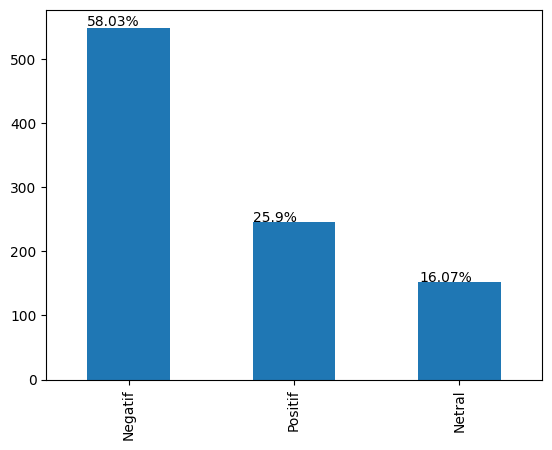

In [ ]:
s = pd.value_counts(df['Sentiments'])
ax = s.plot.bar()
n = len(df.index)
print(n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))